<a href="https://colab.research.google.com/github/eladorpBG/ML_assignment4/blob/main/yolov5/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installs
!pip install torchinfo

In [ ]:
# Clone repository
!git clone https://github.com/eladorpBG/ML_assignment4.git  # clone

Cloning into 'ML_assignment4'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 111 (delta 49), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (111/111), 16.45 MiB | 11.93 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [ ]:
# Update repository if needed
%cd ML_assignment4
!git pull

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchinfo import summary

In [ ]:
# Load results table
results = pd.read_csv('/content/ML_assignment4/yolov5/results.csv')
results = results.rename(columns=lambda x: x.strip())
results = results.rename(columns=lambda x: x.replace('/', '_'))

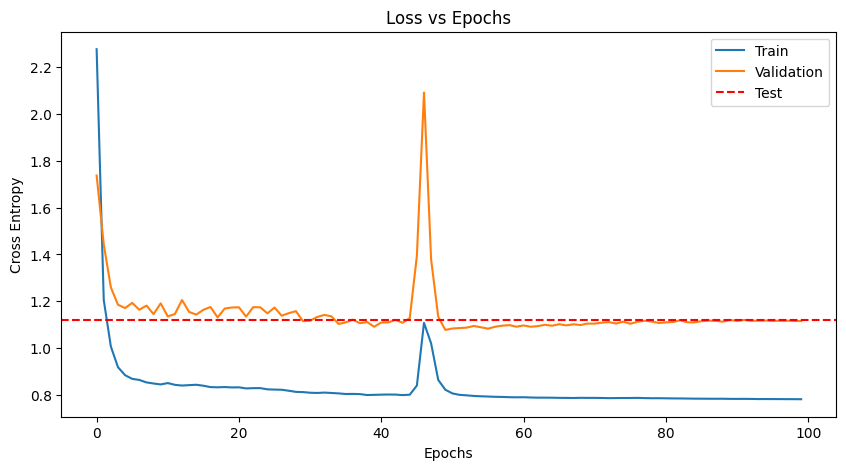

In [ ]:
# Plot Loss vs Epochs
plt.figure(figsize=(10, 5))
plt.plot(results['train_loss'])
plt.plot(results['val_loss'])
plt.axhline(1.119, linestyle='--', color='r')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.title('Loss vs Epochs')
plt.legend(['Train', 'Validation', 'Test'])
plt.show()

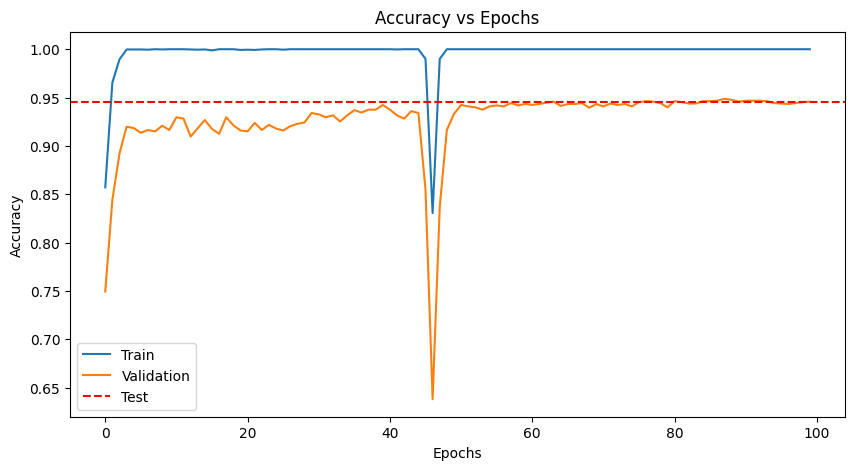

In [ ]:
# Plot Accuracy vs Epochs
plt.figure(figsize=(10, 5))
plt.plot(results['metrics_accuracy_train_top1'])
plt.plot(results['metrics_accuracy_top1'])
plt.axhline(0.945, linestyle='--', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend(['Train', 'Validation', 'Test'])
plt.show()

In [ ]:
# Load model
model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/ML_assignment4/yolov5/best.pt')

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-1-29 Python-3.11.11 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 117 layers, 4297350 parameters, 0 gradients, 10.5 GFLOPs
WARNING ⚠️ YOLOv5 ClassificationModel is not yet AutoShape compatible. You must pass torch tensors in BCHW to this model, i.e. shape(1,3,224,224).


In [ ]:
# Print all layers of model
for layer in model.modules():
    print(layer)

In [ ]:
# Print summary of the layers
summary(model,
        input_size=(16, 3, 224, 224),
        batch_dim=None,
        verbose=1,
        col_width=16,
        col_names=["kernel_size", "input_size", "output_size", "num_params"])  # Specify input dimensions


Layer (type:depth-idx)                             Kernel Shape     Input Shape      Output Shape     Param #
DetectMultiBackend                                 --               [16, 3, 224, 224] [16, 102]        --
├─ClassificationModel: 1-1                         --               [16, 3, 224, 224] [16, 102]        --
│    └─Sequential: 2-1                             --               --               --               --
│    │    └─Conv: 3-1                              --               [16, 3, 224, 224] [16, 32, 112, 112] (3,488)
│    │    └─Conv: 3-2                              --               [16, 32, 112, 112] [16, 64, 56, 56] (18,496)
│    │    └─C3: 3-3                                --               [16, 64, 56, 56] [16, 64, 56, 56] (18,624)
│    │    └─Conv: 3-4                              --               [16, 64, 56, 56] [16, 128, 28, 28] (73,856)
│    │    └─C3: 3-5                                --               [16, 128, 28, 28] [16, 128, 28, 28] (115,200)
│    │    

Layer (type:depth-idx)                             Kernel Shape     Input Shape      Output Shape     Param #
DetectMultiBackend                                 --               [16, 3, 224, 224] [16, 102]        --
├─ClassificationModel: 1-1                         --               [16, 3, 224, 224] [16, 102]        --
│    └─Sequential: 2-1                             --               --               --               --
│    │    └─Conv: 3-1                              --               [16, 3, 224, 224] [16, 32, 112, 112] (3,488)
│    │    └─Conv: 3-2                              --               [16, 32, 112, 112] [16, 64, 56, 56] (18,496)
│    │    └─C3: 3-3                                --               [16, 64, 56, 56] [16, 64, 56, 56] (18,624)
│    │    └─Conv: 3-4                              --               [16, 64, 56, 56] [16, 128, 28, 28] (73,856)
│    │    └─C3: 3-5                                --               [16, 128, 28, 28] [16, 128, 28, 28] (115,200)
│    │    

In [ ]:
# Use to calculate output shapes of layers inside C3
def calculate_output_size(input_size, kernel_size, stride, padding):
    output_size = (input_size - kernel_size + 2 * padding) // stride + 1
    return output_size

calculate_output_size(7, 1, 1, 0)